# Intro to Matlab
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

As a demo of the language, plot sin and cos on the same axis:

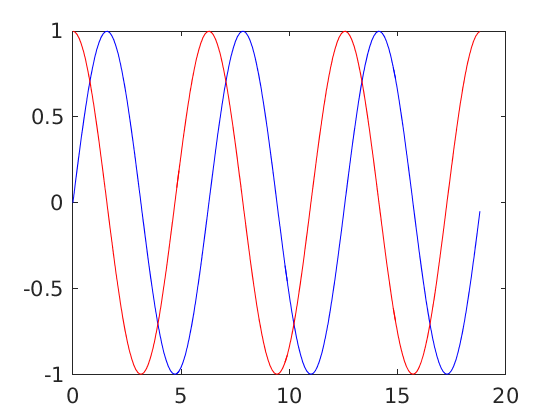

In [2]:
% define an array from 0 to 6*pi with steps of 0.1 using start:by:end
x = 0:0.1:6*pi;

% plot the sin of these points
plot(x, sin(x), 'b');

% keep the plot open
hold on;

% plot the cos of the points
plot(x, cos(x), 'r')

# NetCDF
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

Matlab comes with native NetCDF capability. If you know the url of the dataset that you are interested in, you can display all the info about that datset using **ncdisp(data_url)** or **ncdisp(data_url, variable)** to look at just one variable.

In [3]:
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc';
variable = 'AirTC_Avg';

At this point you haven't pulled over any actual data, to do that you use **ncread(data_url, variable)**. To read data attributes, use **ncreadatt(data_url, variable, attribute_name)**.

In [4]:
AirTData  = ncread(data_url, variable);
AirTUnits = ncreadatt(data_url, variable, 'units');

In [5]:
timeData = ncread(data_url, 'time');
timeUnits = ncreadatt(data_url, 'time', 'units');

In this NetCDF file the time units tell us that time is stored as seconds since 1970-01-01. That time format is often called POSIX time. To convert to a more legible time format, we can use the **datetime** function:

In [6]:
% convert time to a vector of datetimes
time = datetime( timeData, 'ConvertFrom', 'posixtime' );

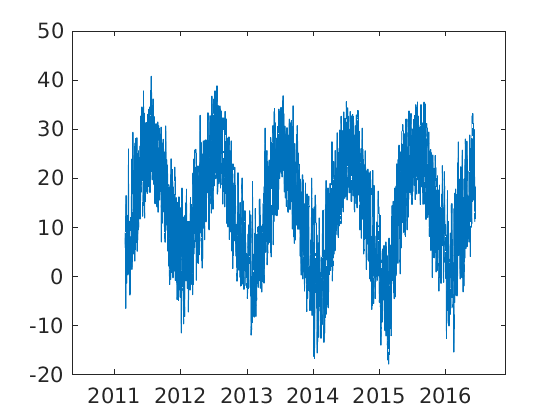

In [7]:
plot(time, AirTData)

## Time slices
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) | [Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

We often are more interested in looking at one particular time, rather than the whole record. To avoid loading all of the data, it is best to slice by the index of the time variable. 

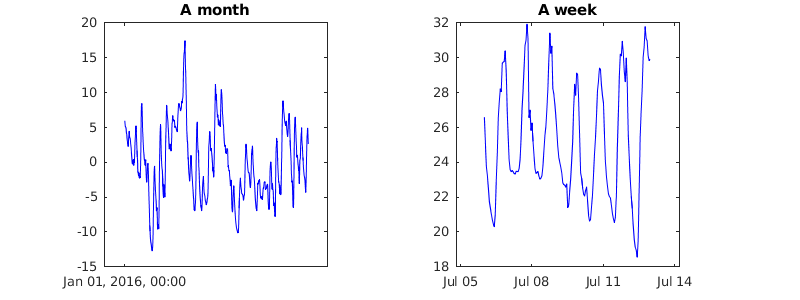

In [12]:
% slice the dataset or choose a date period (such as a month)
start = find(time=='2016-01-01');
count = find(time=='2016-01-31')-start;
AirT = ncread(data_url, variable, start, count, 1);
t = time(start:start+count-1);
a_month = table(t, AirT);

% or a week
start = find(time=='2015-07-06 00:00:00');
count = find(time=='2015-07-13 00:00:00')-start;
AirT= ncread(data_url, variable, start, count, 1);
t = time(start:start+count-1);
a_week = table(t, AirT);

subplot(1,2,1);
plot(a_month.t, a_month.AirT, 'b');
title('A month');
set(gca,'fontsize', 6);

subplot(1,2,2);
plot(a_week.t, a_week.AirT, 'b');
title('A week');
set(gca,'fontsize', 6);

## Multiple variables
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) |[Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

To plot several variables over a defined period of time, we can use a list of variables, and a slice of time. If we want to save time by not reading in all of the data unnecessarily, we can find the indexers for the times that we are interested in. Then we can grab just the data for the timespan of interest

In [13]:
start = find(time=='2015-07-06');
count = find(time=='2015-07-13')-start;

Rain = ncread(data_url,'Rain_mm_3_Tot', start, count, 1);
VW = ncread(data_url,'VW', start, count, 1);
t = time(start:start+count-1);

a_week = table(t, Rain, VW);

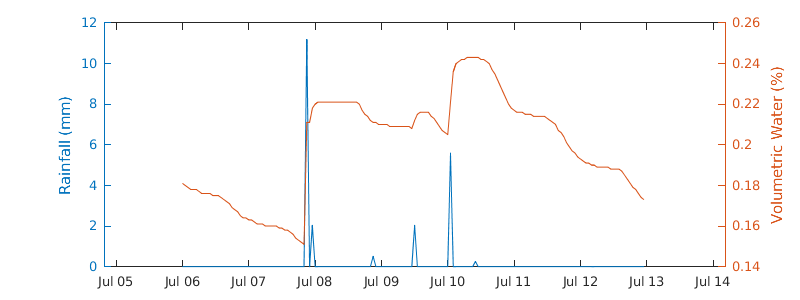

In [14]:
[ax,p1,p2] = plotyy(a_week.t, a_week.Rain, a_week.t, a_week.VW);

ylabel(ax(1),'Rainfall (mm)') % label left y-axis
ylabel(ax(2),'Volumetric Water (%)') % label right y-axis
set(ax(1:2),'fontsize', 6);

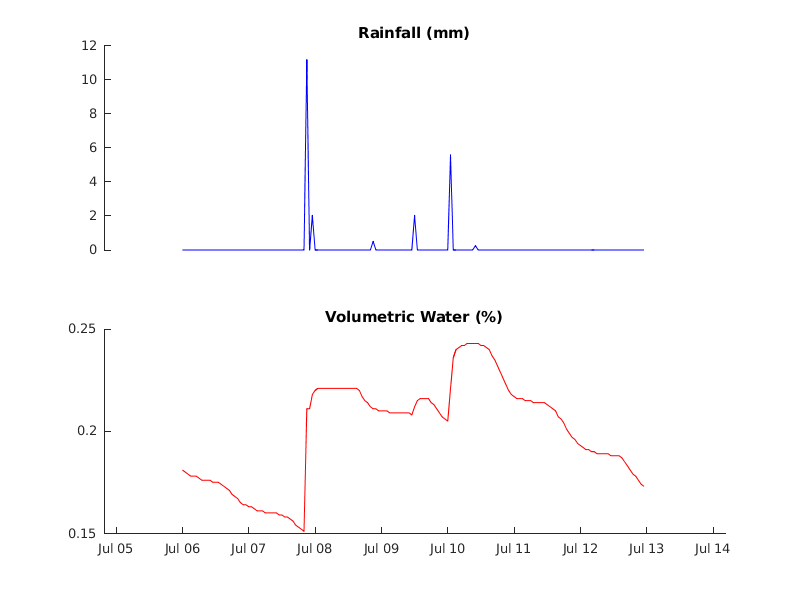

In [34]:
h(1) = subplot(2,1,1);
plot(a_week.t, a_week.Rain, 'b');
title('Rainfall (mm)');

h(2) = subplot(2,1,2);
plot(a_week.t, a_week.VW, 'r');
title('Volumetric Water (%)');

set(h(1),'xcolor','w');
set(h(1:2),'fontsize', 6);
set(h(1:2), 'box', 'off');

## Multiple sites
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) | [Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

In [24]:
variable1 = 'Rain_1_mm_Tot';
variable2 = 'Rain_2_mm_Tot';
data_url = strcat('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc');

timeData = ncread(data_url, 'time');
time = datetime( timeData, 'ConvertFrom', 'posixtime');

start = find(time=='2016-02-23 12:00:00');
count = find(time=='2016-02-26 12:00:00')-start;
var1 = ncread(data_url,variable1, start, count, 1);
var2 = ncread(data_url,variable2, start, count, 1);
t = time(start:start+count-1);

broadmead_rain = table(t, var1, var2);
broadmead_rain.Properties.VariableNames = {'t' variable1 variable2};

In [25]:
variable = 'Lvl_cm_Avg';
data_url = strcat('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_lake.nc');

timeData = ncread(data_url, 'time');
time = datetime( timeData, 'ConvertFrom', 'posixtime');

start = find(time=='2016-02-23 12:00:00');
count = find(time=='2016-02-26 12:00:00')-start;
var = ncread(data_url,variable, start, count, 1);
t = time(start:start+count-1);

washington_lake = table(t, var);
washington_lake.Properties.VariableNames = {'t' variable};

In [26]:
variable = 'Corrected_cm_Avg';
data_url = strcat('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_up.nc');

timeData = ncread(data_url, 'time');
time = datetime( timeData, 'ConvertFrom', 'posixtime');

start = find(time=='2016-02-23 12:00:00');
count = find(time=='2016-02-26 12:00:00')-start;
var = ncread(data_url,variable, start, count, 1);
t = time(start:start+count-1);

washington_up = table(t, var);
washington_up.Properties.VariableNames = {'t' variable};

In [27]:
variable = 'Corrected_cm_Avg';
data_url = strcat('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/washington_down.nc');

timeData = ncread(data_url, 'time');
time = datetime( timeData, 'ConvertFrom', 'posixtime');

start = find(time=='2016-02-23 12:00:00');
count = find(time=='2016-02-26 12:00:00')-start;
var = ncread(data_url,variable, start, count, 1);
t = time(start:start+count-1);

washington_down = table(t, var);
washington_down.Properties.VariableNames = {'t' variable};

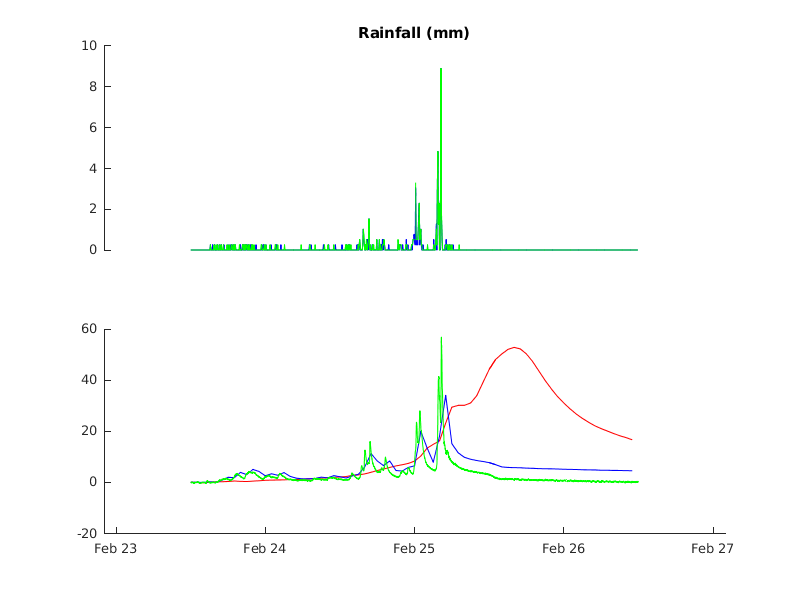

In [33]:
h(1) = subplot(2,1,1);
plot(broadmead_rain.t, broadmead_rain.Rain_1_mm_Tot, 'b');
hold on;
plot(broadmead_rain.t, broadmead_rain.Rain_2_mm_Tot, 'g');
title('Rainfall (mm)');

h(2) = subplot(2,1,2);
plot(washington_lake.t, washington_lake.Lvl_cm_Avg-washington_lake.Lvl_cm_Avg(1), 'r');
hold on;
plot(washington_down.t, washington_down.Corrected_cm_Avg-washington_down.Corrected_cm_Avg(1), 'b');
hold on;
plot(washington_up.t, washington_up.Corrected_cm_Avg-washington_up.Corrected_cm_Avg(1), 'g');

set(h(1),'xcolor','w');
set(h(1:2),'fontsize', 6);
set(h(1:2), 'box', 'off');

## Using functions
[NetCDF](#NetCDF) | [Time slices](#Time-slices) | [Multiple variables](#Multiple-variables) | [Multiple sites](#Multiple-sites) | [Using functions](#Using-functions)

You might have noticed that the way we pulled data from a multiple datasets was redundant. To simplify this process, we can write a quick function that can be used to pull from any site, any variable and setting your own start and end times. To show how this works, we will do the same exercise that we just did above, but in many fewer lines. Functions can be saved in files that we can use again and again. The above function is saved in a file called **select_time_slice.m**. To load the function from there first make sure that you are in the same folder as **select_time_slice.m**, then call it from the command line as follows:

In [31]:
broadmead_rain1 = select_time_slice('broadmead', 'Rain_1_mm_Tot', '2016-02-23 12:00:00', '2016-02-26 12:00:00');
broadmead_rain2 = select_time_slice('broadmead', 'Rain_2_mm_Tot', '2016-02-23 12:00:00', '2016-02-26 12:00:00');
washington_lake = select_time_slice('washington_lake', 'Lvl_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 12:00:00');
washington_down = select_time_slice('washington_down', 'Corrected_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 12:00:00');
washington_up = select_time_slice('washington_up', 'Corrected_cm_Avg', '2016-02-23 12:00:00', '2016-02-26 12:00:00');

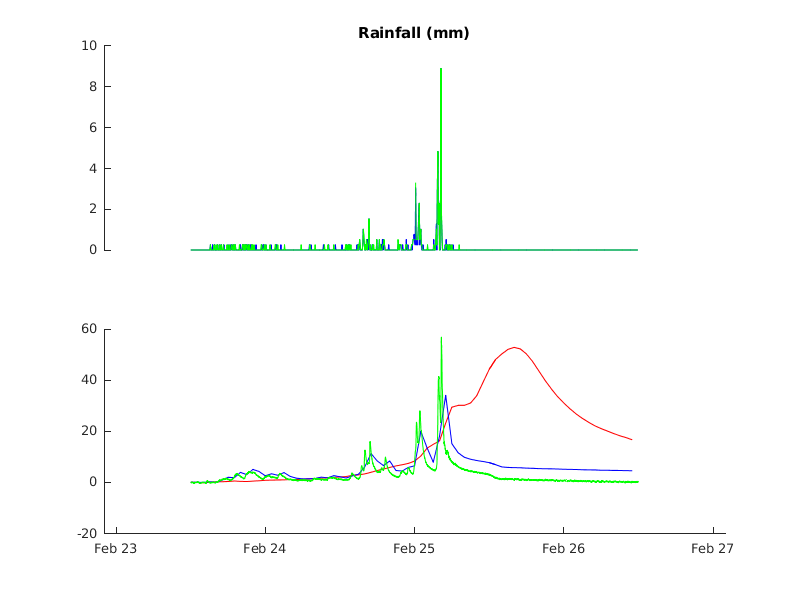

In [32]:
h(1) = subplot(2,1,1);
plot(broadmead_rain1.t, broadmead_rain.Rain_1_mm_Tot, 'b');
hold on;
plot(broadmead_rain2.t, broadmead_rain.Rain_2_mm_Tot, 'g');
title('Rainfall (mm)');

h(2) = subplot(2,1,2);
plot(washington_lake.t, washington_lake.Lvl_cm_Avg-washington_lake.Lvl_cm_Avg(1), 'r');
hold on;
plot(washington_down.t, washington_down.Corrected_cm_Avg-washington_down.Corrected_cm_Avg(1), 'b');
hold on;
plot(washington_up.t, washington_up.Corrected_cm_Avg-washington_up.Corrected_cm_Avg(1), 'g');

set(h(1),'xcolor','w');
set(h(1:2),'fontsize', 6);
set(h(1:2), 'box', 'off');